In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style='whitegrid')

# Plot NSL-KDD result

In [3]:
result_nslkdd = pd.read_csv('./result/nslkdd/binary/total_result_nslkdd.csv')

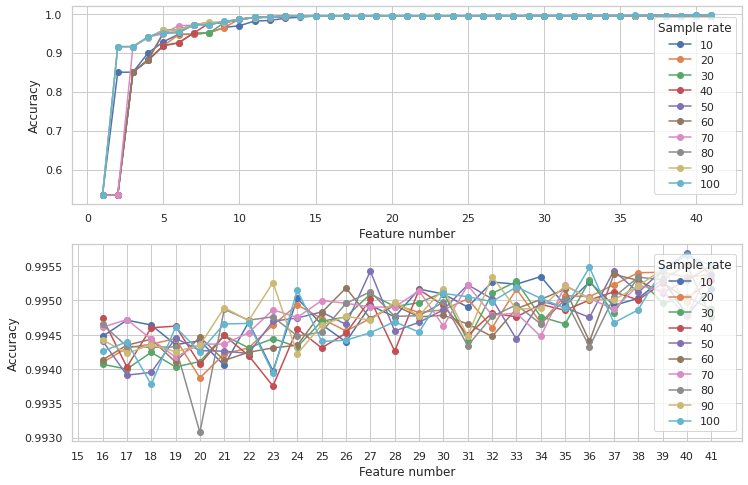

In [4]:
plt.figure(figsize=(12, 8))
ax1 = plt.subplot(2, 1, 1)

for idx, df in result_nslkdd.groupby(['sample_rate']):
    plt.plot(df['feature_num'], df['acc'], 'o-', label=idx)
plt.xlabel('Feature number')
plt.ylabel('Accuracy')
plt.legend(title='Sample rate', loc='right')

ax2 = plt.subplot(2, 1, 2)
floor = 15
for idx, df in result_nslkdd.groupby(['sample_rate']):
    plt.plot(df['feature_num'].iloc[floor:], df['acc'].iloc[floor:], 'o-', label=idx)
plt.xlabel('Feature number')
plt.ylabel('Accuracy')
plt.xticks(range(floor, 42))
plt.legend(title='Sample rate', loc='right')

In [5]:
def create_table(df, int_col):
    total = ''
    for row in df.values:
        tmp = ''
        for idx, item in enumerate(row):
            if idx in int_col:
                item = int(item)
            else:
                item = item.round(4)
            tmp += str(item) + ' & '
        tmp = tmp[:-2]
        tmp += '\\\\'
        tmp += '\n'
        total += tmp
    return total

In [6]:
feature_num = 20
table_nslkdd_binary = create_table(result_nslkdd[result_nslkdd['feature_num']==feature_num].drop(['feature_num','training_time', 'testing_time'], axis=1), int_col=[0])
print(table_nslkdd_binary)

10 & 0.9954 & 0.9941 & 0.9948 & 0.0053 & 0.9944 \\
20 & 0.9958 & 0.9928 & 0.9943 & 0.0048 & 0.9939 \\
30 & 0.9959 & 0.9931 & 0.9945 & 0.0047 & 0.9941 \\
40 & 0.9953 & 0.9936 & 0.9944 & 0.0054 & 0.9941 \\
50 & 0.995 & 0.9942 & 0.9946 & 0.0057 & 0.9943 \\
60 & 0.9957 & 0.9939 & 0.9948 & 0.0049 & 0.9945 \\
70 & 0.9951 & 0.9943 & 0.9947 & 0.0056 & 0.9944 \\
80 & 0.9958 & 0.9913 & 0.9935 & 0.0048 & 0.9931 \\
90 & 0.9953 & 0.9941 & 0.9947 & 0.0054 & 0.9943 \\
100 & 0.995 & 0.9942 & 0.9946 & 0.0057 & 0.9943 \\



In [7]:
result_nslkdd_baseline = pd.read_csv('./result/nslkdd/binary/baseline.csv', index_col=[0, 1])
result_nslkdd_baseline.index.names = ['learner', 'cv']
comparation_nslkdd = result_nslkdd_baseline.groupby(['learner']).mean()

In [8]:
result_nslkdd_xgb_dnn = pd.read_csv('./result/nslkdd/binary/xgboost_dnn.csv', index_col=0)
comparation_nslkdd.loc['XGBoost-DNN'] = result_nslkdd_xgb_dnn.T.values[0]

In [9]:
result_nslkdd_dbn_svm = pd.read_csv('./result/nslkdd/binary/DBN_ensemble_SVM.csv')
comparation_nslkdd.loc['DBN-SVM'] = result_nslkdd_dbn_svm.values[0]

In [10]:
comparation_nslkdd.loc['EFS-DNN'] = result_nslkdd.groupby(['sample_rate', 'feature_num']).mean().loc[60, 20]

In [11]:
comparation_nslkdd.drop(['C4.5', 'CART', 'KNN', 'RF']).T

learner,NB,SVC,lr,XGBoost-DNN,DBN-SVM,EFS-DNN
precision,0.923393,0.950002,0.947198,0.905523,0.9727,0.995699
recall,0.877351,0.955895,0.959771,0.980358,0.9217,0.993938
f1_score,0.899603,0.952939,0.953442,0.941173,0.9465,0.994817
fpr,0.083993,0.057796,0.061460,0.118174,0.0432,0.004927
acc,0.895335,0.949525,0.949890,0.934449,0.9852,0.994467
training_time,0.074447,1.783115,2.001857,19.275336,47.3241,20.681509
testing_time,0.012342,0.004295,0.007943,3.636905,0.0352,2.301754


In [12]:
table_nslkdd_comparation_binary = create_table(comparation_nslkdd.drop(['C4.5', 'CART', 'KNN', 'RF']).T, int_col=[])
print(table_nslkdd_comparation_binary)

0.9234 & 0.95 & 0.9472 & 0.9055 & 0.9727 & 0.9957 \\
0.8774 & 0.9559 & 0.9598 & 0.9804 & 0.9217 & 0.9939 \\
0.8996 & 0.9529 & 0.9534 & 0.9412 & 0.9465 & 0.9948 \\
0.084 & 0.0578 & 0.0615 & 0.1182 & 0.0432 & 0.0049 \\
0.8953 & 0.9495 & 0.9499 & 0.9344 & 0.9852 & 0.9945 \\
0.0744 & 1.7831 & 2.0019 & 19.2753 & 47.3241 & 20.6815 \\
0.0123 & 0.0043 & 0.0079 & 3.6369 & 0.0352 & 2.3018 \\



# Plot KDD-99 result

In [13]:
result_kdd99 = pd.read_csv('./result/kdd99/binary/total_result_kdd99.csv')

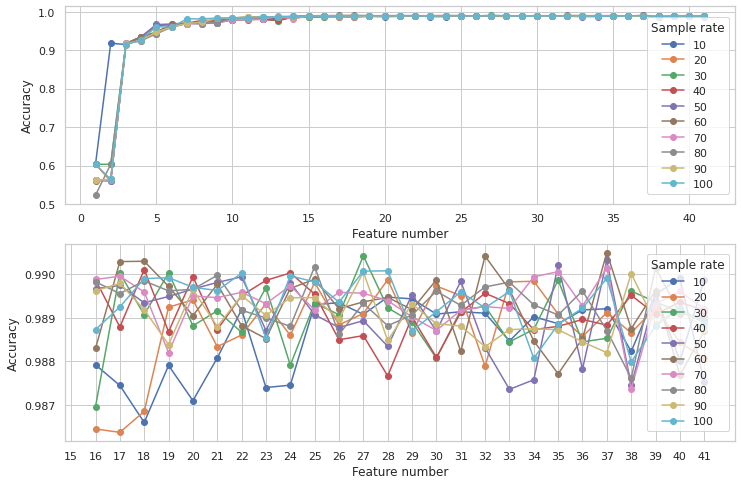

In [14]:
plt.figure(figsize=(12, 8))
ax1 = plt.subplot(2, 1, 1)

for idx, df in result_kdd99.groupby(['sample_rate']):
    plt.plot(df['feature_num'], df['acc'], 'o-', label=idx)
plt.xlabel('Feature number')
plt.ylabel('Accuracy')
plt.legend(title='Sample rate', loc='right')

ax2 = plt.subplot(2, 1, 2)
floor = 15
for idx, df in result_kdd99.groupby(['sample_rate']):
    plt.plot(df['feature_num'].iloc[floor:], df['acc'].iloc[floor:], 'o-', label=idx)
plt.xlabel('Feature number')
plt.ylabel('Accuracy')
plt.xticks(range(floor, 42))
plt.legend(title='Sample rate', loc='right')

In [15]:
feature_num = 20
table_kdd99_binary = create_table(result_kdd99[result_kdd99['feature_num']==feature_num].drop(['feature_num','training_time', 'testing_time'], axis=1), int_col=[0])
print(table_kdd99_binary)

10 & 0.9858 & 0.993 & 0.9893 & 0.0218 & 0.9871 \\
20 & 0.9853 & 0.9974 & 0.9913 & 0.0227 & 0.9894 \\
30 & 0.9852 & 0.9964 & 0.9908 & 0.0228 & 0.9888 \\
40 & 0.9868 & 0.9966 & 0.9917 & 0.0202 & 0.9899 \\
50 & 0.9868 & 0.9962 & 0.9915 & 0.0203 & 0.9897 \\
60 & 0.9858 & 0.9962 & 0.991 & 0.0219 & 0.9891 \\
70 & 0.9868 & 0.996 & 0.9913 & 0.0203 & 0.9895 \\
80 & 0.9859 & 0.9971 & 0.9915 & 0.0216 & 0.9897 \\
90 & 0.9861 & 0.9969 & 0.9915 & 0.0213 & 0.9897 \\
100 & 0.9864 & 0.9967 & 0.9915 & 0.021 & 0.9897 \\



In [16]:
result_kdd99_baseline = pd.read_csv('./result/kdd99/binary/baseline.csv', index_col=[0, 1])
result_kdd99_baseline.index.names = ['learner', 'cv']
comparation_kdd99 = result_kdd99_baseline.groupby(['learner']).mean()

In [17]:
result_kdd99_xgb_dnn = pd.read_csv('./result/kdd99/binary/xgboost_dnn.csv', index_col=0)
comparation_kdd99.loc['XGBoost-DNN'] = result_kdd99_xgb_dnn.T.values[0]

In [18]:
# result_kdd99_dbn_svm = pd.read_csv('./result/kdd99/binary/DBN_ensemble_SVM.csv')
# comparation_kdd99.loc['DBN-SVM'] = result_kdd99_dbn_svm.values[0]

In [19]:
comparation_kdd99.loc['EFS-DNN'] = result_kdd99.groupby(['sample_rate', 'feature_num']).mean().loc[40, 20]

In [21]:
table_kdd99_comparation_binary = create_table(comparation_kdd99.drop(['C4.5', 'CART', 'KNN', 'RF']).T, int_col=[])
print(table_kdd99_comparation_binary)

0.973 & 0.9812 & 0.9815 & 0.9715 & 0.9868 \\
0.9813 & 0.9951 & 0.9927 & 0.9709 & 0.9966 \\
0.9771 & 0.9881 & 0.9871 & 0.9703 & 0.9917 \\
0.0414 & 0.0289 & 0.0285 & 0.0438 & 0.0202 \\
0.9723 & 0.9855 & 0.9843 & 0.9651 & 0.9899 \\
0.0746 & 1.0746 & 1.994 & 21.4708 & 24.3998 \\
0.014 & 0.0041 & 0.0053 & 3.7967 & 2.4353 \\



In [ ]:
comparation_kdd99.drop(['C4.5', 'CART', 'KNN', 'RF']).T.loc[['training_time', 'testing_time']]

learner,NB,SVC,lr,XGBoost-DNN,EFS-DNN
training_time,0.074559,1.074560,1.993993,21.470847,24.399833
testing_time,0.013983,0.004144,0.005328,3.796667,2.435311


In [39]:
comparation_nslkdd.drop(['C4.5', 'CART', 'KNN', 'RF', 'DBN-SVM']).T.loc[['training_time', 'testing_time']]

learner,NB,SVC,lr,XGBoost-DNN,EFS-DNN
training_time,0.074447,1.783115,2.001857,19.275336,20.681509
testing_time,0.012342,0.004295,0.007943,3.636905,2.301754


# Training and testing time

In [45]:
table_train_test_time = create_table(pd.concat([comparation_kdd99.drop(['C4.5', 'CART', 'KNN', 'RF']).T.loc[['training_time', 'testing_time']], comparation_nslkdd.drop(['C4.5', 'CART', 'KNN', 'RF', 'DBN-SVM']).T.loc[['training_time', 'testing_time']]]), int_col=[])
print(table_train_test_time)

0.0746 & 1.0746 & 1.994 & 21.4708 & 24.3998 \\
0.014 & 0.0041 & 0.0053 & 3.7967 & 2.4353 \\
0.0744 & 1.7831 & 2.0019 & 19.2753 & 20.6815 \\
0.0123 & 0.0043 & 0.0079 & 3.6369 & 2.3018 \\



In [ ]:
result_nslkdd_time = result_nslkdd.groupby(['feature_num']).mean()[['training_time', 'testing_time']]
result_kdd99_time = result_kdd99.groupby(['feature_num']).mean()[['training_time', 'testing_time']]

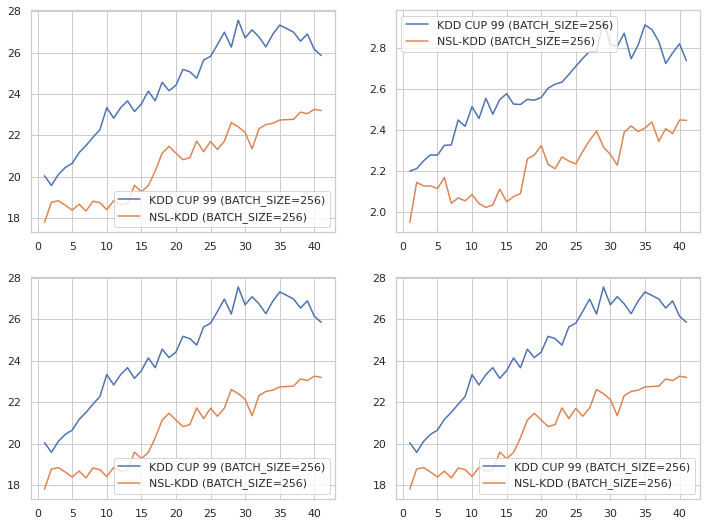

In [ ]:
fig = plt.figure(figsize=(12, 9))

ax1 = plt.subplot(2, 2, 1)
plt.plot(result_kdd99_time.index, result_kdd99_time['training_time'], label='KDD CUP 99 (BATCH_SIZE=256)')
plt.plot(result_nslkdd_time.index, result_nslkdd_time['training_time'], label='NSL-KDD (BATCH_SIZE=256)')
plt.legend()

ax2 = plt.subplot(2, 2, 2)
plt.plot(result_kdd99_time.index, result_kdd99_time['testing_time'], label='KDD CUP 99 (BATCH_SIZE=256)')
plt.plot(result_nslkdd_time.index, result_nslkdd_time['testing_time'], label='NSL-KDD (BATCH_SIZE=256)')
plt.legend()

ax3 = plt.subplot(2, 2, 3)
plt.plot(result_kdd99_time.index, result_kdd99_time['training_time'], label='KDD CUP 99 (BATCH_SIZE=256)')
plt.plot(result_nslkdd_time.index, result_nslkdd_time['training_time'], label='NSL-KDD (BATCH_SIZE=256)')
plt.legend()

ax4 = plt.subplot(2, 2, 4)
plt.plot(result_kdd99_time.index, result_kdd99_time['training_time'], label='KDD CUP 99 (BATCH_SIZE=256)')
plt.plot(result_nslkdd_time.index, result_nslkdd_time['training_time'], label='NSL-KDD (BATCH_SIZE=256)')
plt.legend()

In [ ]:
result_kdd99_sample_rate = result_kdd99[result_kdd99['feature_num']==feature_num]
result_nslkdd_sample_rate = result_nslkdd[result_nslkdd['feature_num']==feature_num]

In [ ]:
result_kdd99_sample_rate

,sample_rate,feature_num,precision,recall,f1_score,fpr,acc,training_time,testing_time
19,10,20,0.985762,0.992955,0.989344,0.021819,0.987093,21.677569,2.414139
60,20,20,0.985300,0.997356,0.991289,0.022707,0.989415,24.151680,2.465149
101,30,20,0.985205,0.996437,0.990787,0.022769,0.988818,24.863919,2.636189
142,40,20,0.986846,0.996620,0.991708,0.020210,0.989944,24.399833,2.435311
183,50,20,0.986808,0.996178,0.991469,0.020264,0.989662,25.191376,2.602380
224,60,20,0.985798,0.996222,0.990980,0.021881,0.989051,24.935641,2.533485
265,70,20,0.986770,0.995956,0.991340,0.020313,0.989504,24.139523,2.461654
306,80,20,0.985937,0.997072,0.991472,0.021624,0.989656,23.995177,2.429779
347,90,20,0.986141,0.996871,0.991477,0.021328,0.989656,26.164873,3.201809
388,100,20,0.986367,0.996708,0.991510,0.020950,0.989704,24.718355,2.403611


Text(0.5, 1.0, 'NSL-KDD')

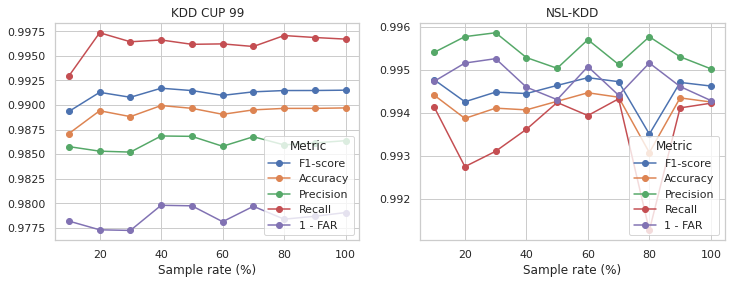

In [ ]:
fig = plt.figure(figsize=(12, 4))

ax1 = plt.subplot(1, 2, 1)
result_kdd99_sample_rate = result_kdd99[result_kdd99['feature_num']==feature_num]
plt.plot(result_kdd99_sample_rate['sample_rate'], result_kdd99_sample_rate['f1_score'], 'o-', label='F1-score')
plt.plot(result_kdd99_sample_rate['sample_rate'], result_kdd99_sample_rate['acc'], 'o-', label='Accuracy')
plt.plot(result_kdd99_sample_rate['sample_rate'], result_kdd99_sample_rate['precision'], 'o-', label='Precision')
plt.plot(result_kdd99_sample_rate['sample_rate'], result_kdd99_sample_rate['recall'], 'o-', label='Recall')
plt.plot(result_kdd99_sample_rate['sample_rate'], 1-result_kdd99_sample_rate['fpr'], 'o-', label='1 - FAR')
plt.legend(title='Metric', loc='lower right')
plt.xlabel('Sample rate (%)')
plt.title('KDD CUP 99')

ax2 = plt.subplot(1, 2, 2)
result_nslkdd_sample_rate = result_nslkdd[result_nslkdd['feature_num']==feature_num]
plt.plot(result_nslkdd_sample_rate['sample_rate'], result_nslkdd_sample_rate['f1_score'], 'o-', label='F1-score')
plt.plot(result_nslkdd_sample_rate['sample_rate'], result_nslkdd_sample_rate['acc'], 'o-', label='Accuracy')
plt.plot(result_nslkdd_sample_rate['sample_rate'], result_nslkdd_sample_rate['precision'], 'o-', label='Precision')
plt.plot(result_nslkdd_sample_rate['sample_rate'], result_nslkdd_sample_rate['recall'], 'o-', label='Recall')
plt.plot(result_nslkdd_sample_rate['sample_rate'], 1-result_nslkdd_sample_rate['fpr'], 'o-', label='1 - FAR')

plt.legend(title='Metric', loc='lower right')
plt.xlabel('Sample rate (%)')
plt.title('NSL-KDD')
